<a href="https://colab.research.google.com/github/BhojRajBist/BhojRajBist/blob/main/Spatial_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

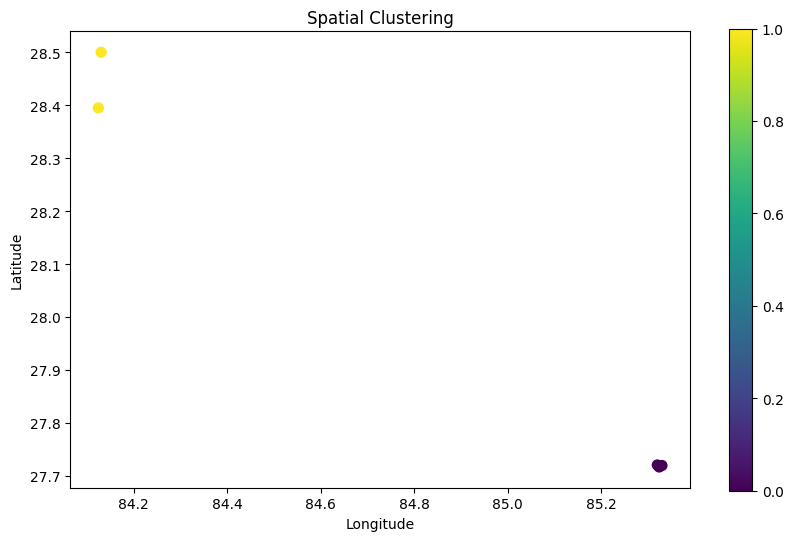

In [15]:
# Import necessary libraries
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

# Generate sample data (Latitude and Longitude)
data = {
    'Name': ['A', 'B', 'C', 'D', 'E'],
    'Latitude': [27.7172, 27.7210, 27.7200, 28.3949, 28.5000],
    'Longitude': [85.3240, 85.3200, 85.3300, 84.1240, 84.1300]
}
df = pd.DataFrame(data)

# Create GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']),
    crs="EPSG:4326"
)

# Convert to numpy array for clustering
coords = np.array(list(zip(gdf['Longitude'], gdf['Latitude'])))

# Apply DBSCAN
db = DBSCAN(eps=0.01, min_samples=2, metric='haversine').fit(np.radians(coords))
gdf['Cluster'] = db.labels_

# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
gdf.plot(ax=ax, column='Cluster', cmap='viridis', legend=True, markersize=50)
plt.title('Spatial Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()
